# IE Predictor Model

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pickle

from config import driver, username, password, host, port, database
from sqlalchemy import create_engine

In [2]:
connection_string = f"{driver}://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)
connection = engine.connect()

In [3]:
# QuestionsListDF = pd.read_sql_table('questionslist', connection)
# QuestionsListDF.head()

In [4]:
# pd.options.display.max_columns = 300
# pd.options.display.max_columns = 100
pd.options.display.max_columns = 20

In [5]:
# local csv file read

QuestionnaireDF = pd.read_csv(Path('../resources/data.csv'), delimiter='\t')
QuestionnaireDF.rename(columns ={'country':'COUNTRY', 
                                 'dateload':'DATELOAD',
                                 'introelapse':'INTROELAPSE',
                                 'testelapse':'TESTELAPSE',
                                 'surveyelapse':'SURVEYELAPSE',
                                 'gender':'GENDER',
                                 'engnat':'ENGNAT',
                                 'age':'AGE',
                                 'IE':'INTROVERT_EXTROVERT'}, inplace=True)
QuestionnaireDF

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,COUNTRY,DATELOAD,INTROELAPSE,TESTELAPSE,SURVEYELAPSE,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,46,1328,4,82,3214,4,43,3360,5,...,3495,US,2019-08-19 12:54:22,8,299,14,2,1,53,1
7184,2,5,8786,5,24,2233,5,10,10387,5,...,6088,CA,2019-08-19 13:10:30,25,498,20,1,1,20,1
7185,3,29,6618,5,44,2393,4,58,5768,5,...,3425,BY,2019-08-19 13:29:47,3,326,17,2,2,28,1
7186,4,15,8321,2,18,6179,5,60,5037,1,...,17416,CA,2019-08-19 15:19:35,3,414,23,2,1,19,1


In [6]:
# Read from AWS

# QuestionnaireDF = pd.read_sql_table('questionnaire', connection)
# QuestionnaireDF.head()

## Preprocessing - Provide output as CleansedDF

In [7]:
# filtering the rows that are not contributing to Classification values "Introvert/Extrovert/Ambivert" 

QuestionnaireDF = QuestionnaireDF.loc[QuestionnaireDF['INTROVERT_EXTROVERT'] != 0]
QuestionnaireDF

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,COUNTRY,DATELOAD,INTROELAPSE,TESTELAPSE,SURVEYELAPSE,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,46,1328,4,82,3214,4,43,3360,5,...,3495,US,2019-08-19 12:54:22,8,299,14,2,1,53,1
7184,2,5,8786,5,24,2233,5,10,10387,5,...,6088,CA,2019-08-19 13:10:30,25,498,20,1,1,20,1
7185,3,29,6618,5,44,2393,4,58,5768,5,...,3425,BY,2019-08-19 13:29:47,3,326,17,2,2,28,1
7186,4,15,8321,2,18,6179,5,60,5037,1,...,17416,CA,2019-08-19 15:19:35,3,414,23,2,1,19,1


In [8]:
# Selecting only features that are considered to be important for training the model

QuestionnaireDF = QuestionnaireDF.drop(columns=['COUNTRY', 'DATELOAD', 'INTROELAPSE', 'TESTELAPSE', 'SURVEYELAPSE'])
QuestionnaireDF.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q90A,Q90I,Q90E,Q91A,Q91I,Q91E,GENDER,ENGNAT,AGE,INTROVERT_EXTROVERT
0,5,51,7107,3,91,2522,1,56,6180,2,...,3,40,4648,3,35,4609,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,4,28,3884,3,1,10409,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,1,87,1759,1,19,2691,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3,15,2345,3,23,3697,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,5,86,6413,5,69,1662,1,1,18,2


In [9]:
# Validating the data in the selected features

QuestionnaireDF['AGE'].sort_values().unique()

array([     14,      15,      16,      17,      18,      19,      20,
            21,      22,      23,      24,      25,      26,      27,
            28,      29,      30,      31,      32,      33,      34,
            35,      36,      37,      38,      39,      40,      41,
            42,      43,      44,      45,      46,      47,      48,
            49,      50,      51,      52,      53,      54,      55,
            56,      57,      58,      59,      60,      61,      62,
            63,      64,      65,      66,      67,      68,      69,
            70,      71,      72,      73,      75,      77,      78,
            79,      81,      90,     255,    1979,    1983,    1990,
          1991,    1996,    1999,    2003, 8675309], dtype=int64)

In [10]:
# Define variables for cleaning age feature. Drop rows with age above max_age

max_age = 100
# Age: Clean up invalid rows where age is above max_age
age_range = (QuestionnaireDF['AGE'] < max_age)
QuestionnaireDF = QuestionnaireDF.loc[age_range]

In [11]:
# DF values after the age clean up

QuestionnaireDF['AGE'].sort_values().unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 81, 90],
      dtype=int64)

In [12]:
#  Selecting only the response columns from the dataframe. Ignoring the columns with Question sequence and response time.

ColumnsList = QuestionnaireDF.columns.to_list()

surveyResponseColumnsList = []
for column in ColumnsList:
    if (column[0] == 'Q' and column[-1] == 'A'):
        surveyResponseColumnsList.append(column)

surveyResponseColumnsList

['Q1A',
 'Q2A',
 'Q3A',
 'Q4A',
 'Q5A',
 'Q6A',
 'Q7A',
 'Q8A',
 'Q9A',
 'Q10A',
 'Q11A',
 'Q12A',
 'Q13A',
 'Q14A',
 'Q15A',
 'Q16A',
 'Q17A',
 'Q18A',
 'Q19A',
 'Q20A',
 'Q21A',
 'Q22A',
 'Q23A',
 'Q24A',
 'Q25A',
 'Q26A',
 'Q27A',
 'Q28A',
 'Q29A',
 'Q30A',
 'Q31A',
 'Q32A',
 'Q33A',
 'Q34A',
 'Q35A',
 'Q36A',
 'Q37A',
 'Q38A',
 'Q39A',
 'Q40A',
 'Q41A',
 'Q42A',
 'Q43A',
 'Q44A',
 'Q45A',
 'Q46A',
 'Q47A',
 'Q48A',
 'Q49A',
 'Q50A',
 'Q51A',
 'Q52A',
 'Q53A',
 'Q54A',
 'Q55A',
 'Q56A',
 'Q57A',
 'Q58A',
 'Q59A',
 'Q60A',
 'Q61A',
 'Q62A',
 'Q63A',
 'Q64A',
 'Q65A',
 'Q66A',
 'Q67A',
 'Q68A',
 'Q69A',
 'Q70A',
 'Q71A',
 'Q72A',
 'Q73A',
 'Q74A',
 'Q75A',
 'Q76A',
 'Q77A',
 'Q78A',
 'Q79A',
 'Q80A',
 'Q81A',
 'Q82A',
 'Q83A',
 'Q84A',
 'Q85A',
 'Q86A',
 'Q87A',
 'Q88A',
 'Q89A',
 'Q90A',
 'Q91A']

In [13]:
# elapsedTimeColumnsList = []
# for column in ColumnsList:
#     if (column[0] == 'Q' and column[-1] == 'E'):
#         elapsedTimeColumnsList.append(column)
        
# elapsedTimeColumnsList   

In [14]:
# elapsedTimeColumnsDF = QuestionnaireDF[['Q1E', 'Q2E', 'Q3E', 'Q4E', 'Q5E']]
# elapsedTimeColumnsDF = QuestionnaireDF[elapsedTimeColumnsList]
# elapsedTimeColumnsDF.head()

In [15]:
# 1 Minute = 60 Seconds = 60,000 Milliseconds
# Identify all rows that have atleast one response time more than 1 minute

# elapsedTimeColumnsDF['Q1E'].loc[lambda x : x > 60000]
# outliersDF = elapsedTimeColumnsDF[elapsedTimeColumnsDF.gt(60000).any(axis=1)]
# outliersDF

In [16]:
# outliersinSecondsDF=outliersDF/1000
# outliersinSecondsDF

In [17]:
#Final Cleansed DF for Machine Learning

#Initially we thought of using Gender, English Language and Age for Predicting the personality. But later we changed our thoughts.
CleansedDF = QuestionnaireDF[surveyResponseColumnsList].copy()
# CleansedDF['GENDER'] = QuestionnaireDF['GENDER']
# CleansedDF['ENGNAT'] = QuestionnaireDF['ENGNAT']
# CleansedDF['AGE'] = QuestionnaireDF['AGE']
CleansedDF['INTROVERT_EXTROVERT'] = QuestionnaireDF['INTROVERT_EXTROVERT']

CleansedDF

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,INTROVERT_EXTROVERT
0,5,3,1,2,3,2,3,3,4,5,...,3,2,1,4,2,5,4,3,3,3
1,5,5,1,5,2,2,5,2,1,3,...,2,2,2,1,3,4,4,4,3,2
2,3,4,5,3,4,5,5,5,5,5,...,5,5,5,4,5,3,2,1,1,1
3,5,2,1,1,5,5,5,4,4,2,...,5,5,5,3,5,4,4,3,3,1
4,1,2,1,1,3,3,5,1,3,4,...,3,1,1,3,1,2,5,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,4,4,5,5,4,4,4,4,4,...,3,5,3,4,3,4,2,5,4,1
7184,2,5,5,5,4,4,5,5,4,3,...,3,5,4,5,4,3,1,3,2,1
7185,3,5,4,5,5,5,4,5,5,5,...,5,5,5,4,5,3,1,1,1,1
7186,4,2,5,1,5,1,5,4,5,1,...,4,5,1,4,1,1,4,5,2,1


## Machine learning 

In [18]:
CleansedDF.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A,INTROVERT_EXTROVERT
0,5,3,1,2,3,2,3,3,4,5,...,3,2,1,4,2,5,4,3,3,3
1,5,5,1,5,2,2,5,2,1,3,...,2,2,2,1,3,4,4,4,3,2
2,3,4,5,3,4,5,5,5,5,5,...,5,5,5,4,5,3,2,1,1,1
3,5,2,1,1,5,5,5,4,4,2,...,5,5,5,3,5,4,4,3,3,1
4,1,2,1,1,3,3,5,1,3,4,...,3,1,1,3,1,2,5,5,5,2


In [19]:
X = CleansedDF.drop(columns=['INTROVERT_EXTROVERT'])
X

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q82A,Q83A,Q84A,Q85A,Q86A,Q87A,Q88A,Q89A,Q90A,Q91A
0,5,3,1,2,3,2,3,3,4,5,...,1,3,2,1,4,2,5,4,3,3
1,5,5,1,5,2,2,5,2,1,3,...,1,2,2,2,1,3,4,4,4,3
2,3,4,5,3,4,5,5,5,5,5,...,5,5,5,5,4,5,3,2,1,1
3,5,2,1,1,5,5,5,4,4,2,...,5,5,5,5,3,5,4,4,3,3
4,1,2,1,1,3,3,5,1,3,4,...,2,3,1,1,3,1,2,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,4,4,5,5,4,4,4,4,4,...,4,3,5,3,4,3,4,2,5,4
7184,2,5,5,5,4,4,5,5,4,3,...,3,3,5,4,5,4,3,1,3,2
7185,3,5,4,5,5,5,4,5,5,5,...,5,5,5,5,4,5,3,1,1,1
7186,4,2,5,1,5,1,5,4,5,1,...,5,4,5,1,4,1,1,4,5,2


In [20]:
y = CleansedDF['INTROVERT_EXTROVERT']
y

0       3
1       2
2       1
3       1
4       2
       ..
7183    1
7184    1
7185    1
7186    1
7187    1
Name: INTROVERT_EXTROVERT, Length: 7153, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, plot_roc_curve, roc_curve, roc_auc_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [71]:
print(f"X_Train Shape: {X_train.shape} \nX_Train Columns: {X_train.columns}")
print(f"X_Test Shape: {X_test.shape} \nX_Test Columns: {X_test.columns}")

X_Train Shape: (4792, 91) 
X_Train Columns: Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'Q43A', 'Q44A', 'Q45A', 'Q46A',
       'Q47A', 'Q48A', 'Q49A', 'Q50A', 'Q51A', 'Q52A', 'Q53A', 'Q54A', 'Q55A',
       'Q56A', 'Q57A', 'Q58A', 'Q59A', 'Q60A', 'Q61A', 'Q62A', 'Q63A', 'Q64A',
       'Q65A', 'Q66A', 'Q67A', 'Q68A', 'Q69A', 'Q70A', 'Q71A', 'Q72A', 'Q73A',
       'Q74A', 'Q75A', 'Q76A', 'Q77A', 'Q78A', 'Q79A', 'Q80A', 'Q81A', 'Q82A',
       'Q83A', 'Q84A', 'Q85A', 'Q86A', 'Q87A', 'Q88A', 'Q89A', 'Q90A', 'Q91A'],
      dtype='object')
X_Test Shape: (2361, 91) 
X_Test Columns: Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', '

## Random Forest

In [43]:
# Train a Random Forest Classifier model and print the model score
# adding import dependencies here again for my reference.
from sklearn.ensemble import RandomForestClassifier

rf_uns_classifier = RandomForestClassifier(random_state=1, n_estimators=400).fit(X_train, y_train)

print("----------------------------------------------")
print("Random Forest Classifier - Unscaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {rf_uns_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_uns_classifier.score(X_test, y_test)}")
print("----------------------------------------------")

----------------------------------------------
Random Forest Classifier - Unscaled Data
----------------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7246929267259635
----------------------------------------------


In [44]:
# save the model to disk
filename = '../saved_models/IE_Predictor_model.sav'
pickle.dump(rf_uns_classifier, open(filename, 'wb'))

In [39]:
# Calculate metrics for the Random Forest Classifier model based on unscaled data

# y_pred = rf_uns_classifier.predict(X_test)

# from sklearn.metrics import confusion_matrix
# print('Confusion Matrix')
# print(confusion_matrix(y_test, y_pred))

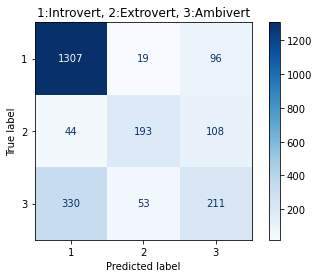

In [45]:
# Calculate metrics and plot the matrix

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_uns_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_uns_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_uns_classifier.classes_)
# disp.plot(cmap="PiYG")
disp.plot(cmap = 'Blues')
# disp.plot(cmap = 'viridis')
plt.title('1:Introvert, 2:Extrovert, 3:Ambivert')
plt.savefig("../images/ConfMatrix-Introvert-Extrovert-Ambivert.png")
plt.show()

In [49]:
# True Introvert, True Entrovert, True Ambert
ti, fi1, fi2, fe1, te, fe2, fa1, fa2, ta = confusion_matrix(y_test, y_pred).ravel()
# accuracy = (tp + tn) / (tp + fp + tn + fn) 
accuracy = (ti + te +ta) / (ti + fi1 + fi2 + fe1 + te + fe2 + fa1 + fa2 + ta) 
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.72469


In [50]:
# Calculate metrics for the Random Forest Classifier model based on unscaled data
print('---------------------------------------------------------')
print('\nMetrics of Random Forest Classifier Model: Average=micro')
print('---------------------------------------------------------')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred,)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred, average='micro')))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred, average='micro')))
print('---------------------------------------------------------')
print('Classification Report')
print('---------------------------------------------------------')
print(classification_report(y_test, y_pred))

---------------------------------------------------------

Metrics of Random Forest Classifier Model: Average=micro
---------------------------------------------------------
Accuracy = 0.72469
Precision = 0.72469
Recall = 0.72469
F1 score = 0.72469
---------------------------------------------------------
Classification Report
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.78      0.92      0.84      1422
           2       0.73      0.56      0.63       345
           3       0.51      0.36      0.42       594

    accuracy                           0.72      2361
   macro avg       0.67      0.61      0.63      2361
weighted avg       0.70      0.72      0.71      2361



In [51]:
print('---------------------------------------------------------')
print('Metrics of Random Forest Classifier Model: Average=macro')
print('---------------------------------------------------------')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred,)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred, average='macro')))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred, average='macro')))
print('---------------------------------------------------------')
print('Classification Report')
print('---------------------------------------------------------')
print(classification_report(y_test, y_pred))

---------------------------------------------------------
Metrics of Random Forest Classifier Model: Average=macro
---------------------------------------------------------
Accuracy = 0.72469
Precision = 0.67142
Recall = 0.61126
F1 score = 0.63114
---------------------------------------------------------
Classification Report
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.78      0.92      0.84      1422
           2       0.73      0.56      0.63       345
           3       0.51      0.36      0.42       594

    accuracy                           0.72      2361
   macro avg       0.67      0.61      0.63      2361
weighted avg       0.70      0.72      0.71      2361



In [52]:
print('-----------------------------------------------------------')
print('Metrics of Random Forest Classifier Model: Average=weighted')
print('-----------------------------------------------------------')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred,)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred, average='weighted')))
print('-----------------------------------------------------------')
print('Classification Report')
print('-----------------------------------------------------------')
print(classification_report(y_test, y_pred))

-----------------------------------------------------------
Metrics of Random Forest Classifier Model: Average=weighted
-----------------------------------------------------------
Accuracy = 0.72469
Precision = 0.70263
Recall = 0.72469
F1 score = 0.70506
-----------------------------------------------------------
Classification Report
-----------------------------------------------------------
              precision    recall  f1-score   support

           1       0.78      0.92      0.84      1422
           2       0.73      0.56      0.63       345
           3       0.51      0.36      0.42       594

    accuracy                           0.72      2361
   macro avg       0.67      0.61      0.63      2361
weighted avg       0.70      0.72      0.71      2361



In [53]:
# Scale the data

# adding import dependencies here again for my reference.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Train a Random Forest Classifier model on the scaled data and print the model score
from sklearn.ensemble import RandomForestClassifier

rf_s_classifier = RandomForestClassifier(random_state=1, n_estimators=400).fit(X_train_scaled, y_train)
print("----------------------------------------------")
print("Random Forest Classifier - Scaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {rf_s_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_s_classifier.score(X_test_scaled, y_test)}")
print("----------------------------------------------")

----------------------------------------------
Random Forest Classifier - Scaled Data
----------------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.7246929267259635
----------------------------------------------


## Logistic Regression

In [56]:
# Train the Logistic Regression model on the unscaled data and print the model score
# adding import dependencies here again for my reference.
from sklearn.linear_model import LogisticRegression

lr_uns_classifier = LogisticRegression()
lr_uns_classifier.fit(X_train, y_train)

print("----------------------------------------------")
print("Logistic Regression - Unscaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {lr_uns_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_uns_classifier.score(X_test, y_test)}")
print("----------------------------------------------")

----------------------------------------------
Logistic Regression - Unscaled Data
----------------------------------------------
Training Data Score: 0.7765025041736227
Testing Data Score: 0.7259635747564591
----------------------------------------------


C:\Users\kesam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Train the Logistic Regression model on the scaled data and print the model score

# adding import dependencies here again for my reference.
from sklearn.linear_model import LogisticRegression

lr_s_classifier = LogisticRegression()
lr_s_classifier.fit(X_train_scaled, y_train)

print("----------------------------------------------")
print("Logistic Regression - Scaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {lr_s_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_s_classifier.score(X_test_scaled, y_test)}")
print("----------------------------------------------")

----------------------------------------------
Logistic Regression - Scaled Data
----------------------------------------------
Training Data Score: 0.7773372287145242
Testing Data Score: 0.7285048708174502
----------------------------------------------


## Multiple Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lnr_uns_classifier = LinearRegression()

# Fitting our model with all our features in X
lnr_uns_classifier.fit(X_train, y_train)

print("----------------------------------------------")
print("Linear Regression - Unscaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {lnr_uns_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {lnr_uns_classifier.score(X_test, y_test)}")
print("----------------------------------------------")

----------------------------------------------
Linear Regression - Unscaled Data
----------------------------------------------
Training Data Score: 0.29771414306965005
Testing Data Score: 0.23095512862618128
----------------------------------------------


In [59]:
from sklearn.linear_model import LinearRegression
lnr_s_classifier = LinearRegression()

# Fitting our model with all our features in X
lnr_s_classifier.fit(X_train_scaled, y_train)

print("----------------------------------------------")
print("Linear Regression - Scaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {lnr_uns_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lnr_uns_classifier.score(X_test_scaled, y_test)}")
print("----------------------------------------------")

----------------------------------------------
Linear Regression - Scaled Data
----------------------------------------------
Training Data Score: -0.18858285304377498
Testing Data Score: -0.2028256166826352
----------------------------------------------


## Unsupervised Learning

In [60]:
# Principal Component Analysis

from sklearn.decomposition import PCA

# Instead of providing the number of components while instantiating the PCA, by specifying the float number between 0.0 and 1.0. 
# This float value represents the ratio of variance you wish to preserve. Here I am setting the variance to 90%.

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_train_scaled)
X_pca

array([[-5.01684825e+00, -1.99056986e-02, -1.96487868e-01, ...,
        -7.33825882e-01, -3.03266390e-01,  2.48200890e-01],
       [ 6.90283939e+00, -1.18332235e+00,  4.69863178e-01, ...,
         6.55967439e-02,  8.32380447e-01,  5.88982872e-01],
       [ 2.13615260e+00,  7.54353040e-01, -7.82052329e-01, ...,
        -1.09962570e+00,  2.37010447e-01, -5.26251135e-01],
       ...,
       [-2.35056475e+00, -2.51615325e-01, -7.84091747e-01, ...,
        -1.29744038e+00, -1.63123678e+00, -6.14446643e-01],
       [-1.15546314e+00, -1.74699702e-01, -1.39612863e+00, ...,
         2.04670670e+00,  4.33726400e-01,  4.27854575e-03],
       [ 7.04547053e+00, -1.28063902e+00, -1.51168285e+00, ...,
        -3.48568534e-01,  1.75817431e-01, -2.44211637e-01]])

In [61]:
# Ratio indicates the proportion of the dataset's variance that lies along each principal component.

pca.explained_variance_ratio_

array([0.21636571, 0.04062087, 0.03651701, 0.03494092, 0.02667246,
       0.02077338, 0.01879753, 0.01742585, 0.01676272, 0.01551321,
       0.01451149, 0.01361561, 0.01246637, 0.01235458, 0.01170087,
       0.01130719, 0.01091296, 0.01070462, 0.01053072, 0.01021964,
       0.00999099, 0.00985928, 0.00944884, 0.00937204, 0.00925309,
       0.009051  , 0.00896934, 0.00880764, 0.0085164 , 0.00845807,
       0.00823961, 0.00806919, 0.00803091, 0.00799026, 0.00780858,
       0.00777137, 0.00756475, 0.00752289, 0.00748339, 0.00737973,
       0.00724659, 0.00717699, 0.00714821, 0.00691221, 0.0068273 ,
       0.0067408 , 0.00667962, 0.00666583, 0.0065004 , 0.00646352,
       0.00640393, 0.00637771, 0.00625664, 0.00621335, 0.00611841,
       0.00610314, 0.00607296, 0.00596339, 0.0058805 , 0.00586416,
       0.00580429, 0.00570813, 0.00560447, 0.00556882, 0.00541366,
       0.00536418, 0.00534728])

In [62]:
# Even though we did not explicitly provide the number of components in PCA, its calculated to be 74 to preserve 90% of the explained variance.

print(f"\nSum of explained variance: {np.sum(pca.explained_variance_ratio_)}")
print(f"Number of dimensions required: {pca.n_components_}")


Sum of explained variance: 0.9007276214026559
Number of dimensions required: 67


In [93]:
# Finding the best value for _k_ using the Elbow Curve
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,392782.095320
1,2,329515.689642
2,3,313525.446404
3,4,306358.283084
4,5,300909.142717
5,6,296328.424580
6,7,292855.742068
7,8,290191.496624
8,9,287639.944174
9,10,285605.625096


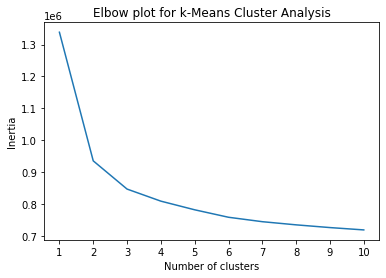

In [102]:
# Elbow curve to identify the best number of clusters

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(k)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot for k-Means Cluster Analysis')
# plt.savefig('../Images/Elbow-plot-k-Means-Cluster.png')
plt.show()

In [98]:
# Finding the best value for _k_ using the Elbow Curve
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_train)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,1.338621e+06
1,2,9.352744e+05
2,3,8.467842e+05
3,4,8.088935e+05
4,5,7.817831e+05
5,6,7.583656e+05
6,7,7.444864e+05
7,8,7.345686e+05
8,9,7.260215e+05
9,10,7.186846e+05


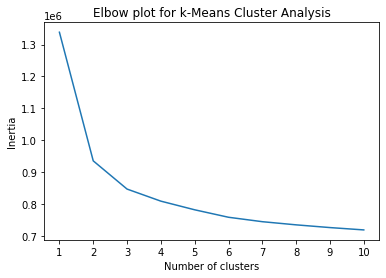

In [101]:
# Elbow curve to identify the best number of clusters

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(k)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot for k-Means Cluster Analysis')
plt.savefig('../Images/Elbow-plot-k-Means-Cluster.png')
plt.show()

## Supervised Learning - Optimization attempts

In [ ]:
# Train a Random Forest Classifier model and print the model score
# adding import dependencies here again for my reference.
from sklearn.ensemble import RandomForestClassifier

rf_uns_classifier = RandomForestClassifier(random_state=1, n_estimators=1000, max_features=None, n_jobs=-1, max_depth=None, bootstrap=True).fit(X_train, y_train)
# rf_uns_classifier = RandomForestClassifier(random_state=1, n_estimators=1000, max_features="sqrt", n_jobs=-1, max_depth=None, min_samples_split=2, bootstrap=False).fit(X_train, y_train)
# rf_uns_classifier = RandomForestClassifier(random_state=1, n_estimators=50, max_leaf_nodes=16, n_jobs=-1).fit(X_train, y_train)
# restrict max_depth , try in 100 steps
# rf_uns_classifier = RandomForestClassifier(random_state=1, n_estimators=100, max_features=None, n_jobs=-1, max_depth=2, bootstrap=True).fit(X_train, y_train)


print("----------------------------------------------")
print("Random Forest Classifier - Unscaled Data")
print("----------------------------------------------")
print(f"Training Data Score: {rf_uns_classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_uns_classifier.score(X_test, y_test)}")
print("----------------------------------------------")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm='SAMME.R', learning_rate=0.5
                            )
ada_clf.fit(X_train, y_train)

print(f"Training Data Score: {ada_clf.score(X_train, y_train)}")
print(f"Testing Data Score: {ada_clf.score(X_test, y_test)}")
print("----------------------------------------------")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm='SAMME.R', learning_rate=0.5
                            )
ada_clf.fit(X_train, y_train)

print(f"Training Data Score: {ada_clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ada_clf.score(X_test_scaled, y_test)}")
print("----------------------------------------------")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
                    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                    n_estimators = 500, max_samples=1.0, bootstrap=True, n_jobs = -1
                        )

bag_clf.fit(X_train, y_train)

print(f"Training Data Score: {bag_clf.score(X_train, y_train)}")
print(f"Testing Data Score: {bag_clf.score(X_test, y_test)}")
print("----------------------------------------------")

bag_clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {bag_clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {bag_clf.score(X_test_scaled, y_test)}")
print("----------------------------------------------")

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()

voting_clf=VotingClassifier(
                estimators=[('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                voting='hard')
voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC(probability=True)

voting_clf=VotingClassifier(
                estimators=[('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                voting='soft')
voting_clf.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(
            DecisionTreeClassifier(),n_estimators=500,
            bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train_scaled, y_train)
y_pred=bag_clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(bag_clf.oob_score_)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=520, learning_rate=0.1, warm_start=True)
gbrt.fit(X_train, y_train)

print(f"Training Data Score: {gbrt.score(X_train, y_train)}")
print(f"Testing Data Score: {gbrt.score(X_test, y_test)}")

errors = [mean_squared_error(y_test,y_pred)
         for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1
print(f"Best Estimators: {bst_n_estimators}")

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, learning_rate=0.1, loss='squared_error')
gbrt_best.fit(X_train, y_train)

print(f"Training Data Score: {gbrt_best.score(X_train, y_train)}")
print(f"Testing Data Score: {gbrt_best.score(X_test, y_test)}")